In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.executable
from statsmodels.tsa.arima_model import ARIMA

In [3]:
df = pd.read_csv("D:\Portfolio\Data\Big_Japan_vs_China_Technology.csv")
df.head(10)

,Country,Year,Tech Sector,Market Share (%),R&D Investment (in USD),Number of Patents Filed (Annual),Number of Tech Companies,Tech Exports (in USD),Number of Startups,Venture Capital Funding (in USD),Global Innovation Ranking,Internet Penetration (%),5G Network Coverage (%),University Research Collaborations,Top Tech Products Exported,Number of Tech Workers
0,China,2001,Software,22.279014,8.377208e+10,1415,878,3.503155e+10,166,4.502694e+10,11,57.088673,82.240272,50,Robots,621221
1,Japan,2011,Semiconductor,31.899013,3.551134e+10,7899,364,3.714209e+10,217,1.147381e+10,14,78.172090,48.552982,134,5G Equipment,431928
2,Japan,2009,Robotics,33.574466,8.480948e+10,3749,425,1.570406e+11,451,5.498885e+09,14,55.810668,66.495286,58,Semiconductors,55776
3,Japan,2019,Cloud Computing,24.904248,2.267821e+10,3841,62,1.031284e+11,264,2.186278e+10,10,78.553714,28.807251,150,Robots,267852
4,China,2002,Robotics,46.975827,3.453655e+10,1704,458,1.112056e+11,463,4.098282e+10,10,70.427548,38.746268,74,AI Chips,654162
5,China,2022,Semiconductor,12.741990,4.029329e+10,186,792,1.686877e+09,247,3.380235e+10,6,94.040043,21.801071,24,Robots,437676
6,China,2022,Cloud Computing,20.476168,4.823453e+10,4313,1738,1.011623e+11,123,3.323102e+10,17,41.655595,88.214560,17,5G Equipment,225028
7,China,2006,Robotics,22.585881,2.177051e+10,8170,1437,8.788322e+10,131,1.833492e+10,19,60.013180,65.573974,112,AI Chips,146593
8,China,2011,AI,12.751686,1.179936e+10,7535,1879,1.308955e+11,269,2.719328e+09,19,86.144044,17.922373,95,Robots,914680
9,Japan,2002,Biotechnology,37.217951,9.792535e+09,3198,601,1.601066e+10,46,2.219210e+10,14,66.944509,45.175813,132,Cloud Servers,382884


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             1000 non-null   object 
 1   Year                                1000 non-null   int64  
 2   Tech Sector                         1000 non-null   object 
 3   Market Share (%)                    1000 non-null   float64
 4   R&D Investment (in USD)             1000 non-null   float64
 5   Number of Patents Filed (Annual)    1000 non-null   int64  
 6   Number of Tech Companies            1000 non-null   int64  
 7   Tech Exports (in USD)               1000 non-null   float64
 8   Number of Startups                  1000 non-null   int64  
 9   Venture Capital Funding (in USD)    1000 non-null   float64
 10  Global Innovation Ranking           1000 non-null   int64  
 11  Internet Penetration (%)            1000 non

In [10]:
df.describe()

,Year,Market Share (%),R&D Investment (in USD),Number of Patents Filed (Annual),Number of Tech Companies,Tech Exports (in USD),Number of Startups,Venture Capital Funding (in USD),Global Innovation Ranking,Internet Penetration (%),5G Network Coverage (%),University Research Collaborations,Number of Tech Workers
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2011.497000,27.439221,5.034591e+10,5094.686000,1011.133000,9.905279e+10,257.524000,2.467234e+10,10.003000,69.739498,49.970784,99.084000,496483.411000
std,6.991486,12.808159,2.829704e+10,2846.164392,563.223321,5.921177e+10,143.525939,1.469330e+10,5.533318,17.071675,23.012153,55.374319,290405.281594
min,2000.000000,5.033959,1.056575e+09,119.000000,52.000000,1.072723e+09,11.000000,3.681449e+07,1.000000,40.079130,10.043427,1.000000,2422.000000
25%,2005.000000,16.333641,2.558291e+10,2789.500000,503.000000,4.605266e+10,131.000000,1.195372e+10,5.000000,54.879624,29.796081,53.000000,248962.500000
50%,2012.000000,27.111042,5.010075e+10,5021.000000,998.500000,9.671071e+10,257.500000,2.453826e+10,10.000000,70.257998,51.150191,100.000000,505236.000000
75%,2017.250000,38.480568,7.492896e+10,7569.500000,1494.250000,1.520491e+11,382.250000,3.711508e+10,15.000000,84.408627,69.795189,147.000000,737879.250000
max,2023.000000,49.955344,9.997537e+10,9989.000000,1999.000000,1.997280e+11,499.000000,4.991708e+10,19.000000,99.935228,89.904580,199.000000,996999.000000


From correlation matrix we can easily see the relationship between columns: 
- Positive Correlation: 
+ + R&D Investment with Number of Patents Filed
+ + Number of Tech Companies with Tech Exports
+ + Market Share and R&D Investment 
+ + NUmber of Tech Companies and Number of Patents filed
- Negative Correlation: 
+ + Global Innovation Ranking and Internet Penetration
+ + Global Innovation Ranking and 5G Network Coverage
+ + Venture Capital Funding with others attributes

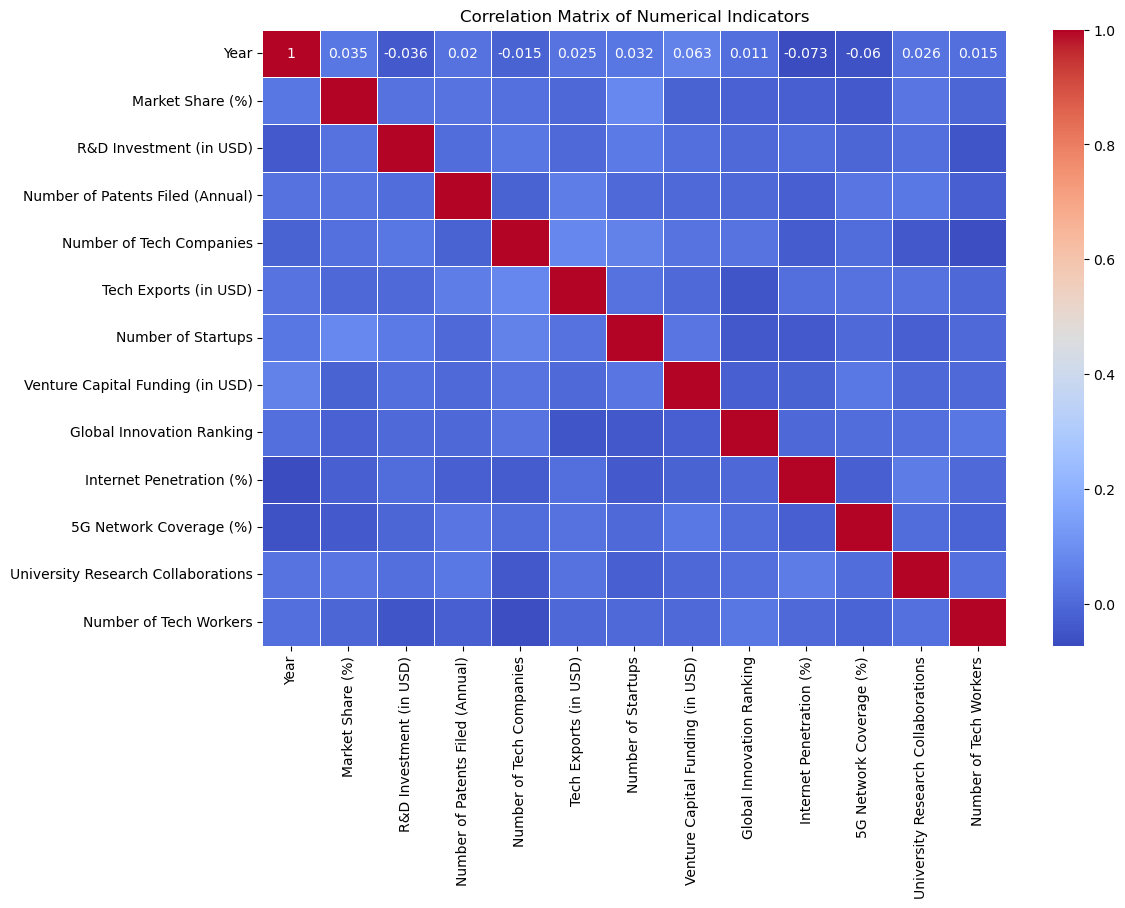

In [17]:
# Select only numerical columns for correlation calculation
numerical_cols = df.select_dtypes(include=['number']).columns
# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Indicators')
plt.show()

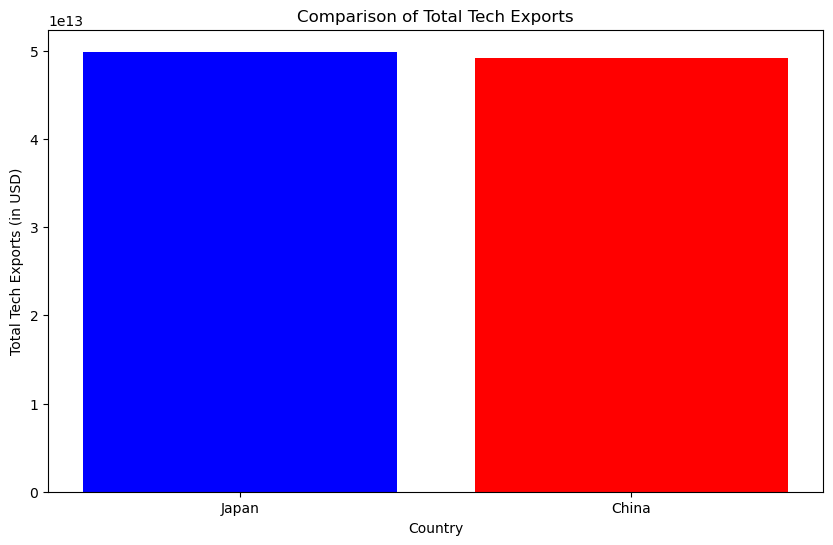

In [93]:
total_exports_japan = df[df['Country'] == 'Japan']['Tech Exports (in USD)'].sum()
total_exports_china = df[df['Country'] == 'China']['Tech Exports (in USD)'].sum()
countries = ['Japan', 'China']
total_exports = [total_exports_japan, total_exports_china]
# Bar plot for Total Tech Exports comparision
plt.figure(figsize=(10,6))
plt.bar(countries, total_exports, color=['blue', 'red'])
plt.title('Comparison of Total Tech Exports')
plt.xlabel('Country')
plt.ylabel('Total Tech Exports (in USD)')
plt.show()

From 2 plot about Internet Penetration and 5G Network Coverage: 
- China is the country with higher 5G Network Coverage while Japan has higher rate in Internet Penetration.

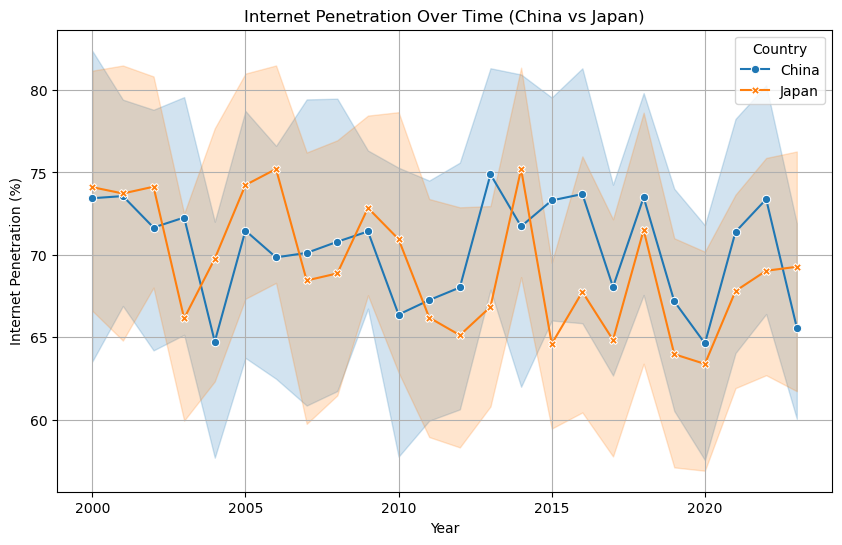

In [94]:
# Compare the Internet Penetration 
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Internet Penetration (%)', hue='Country', style='Country', markers=True, dashes=False)
plt.title('Internet Penetration Over Time (China vs Japan)')
plt.xlabel('Year')
plt.ylabel('Internet Penetration (%)')
plt.grid(True)
plt.show()

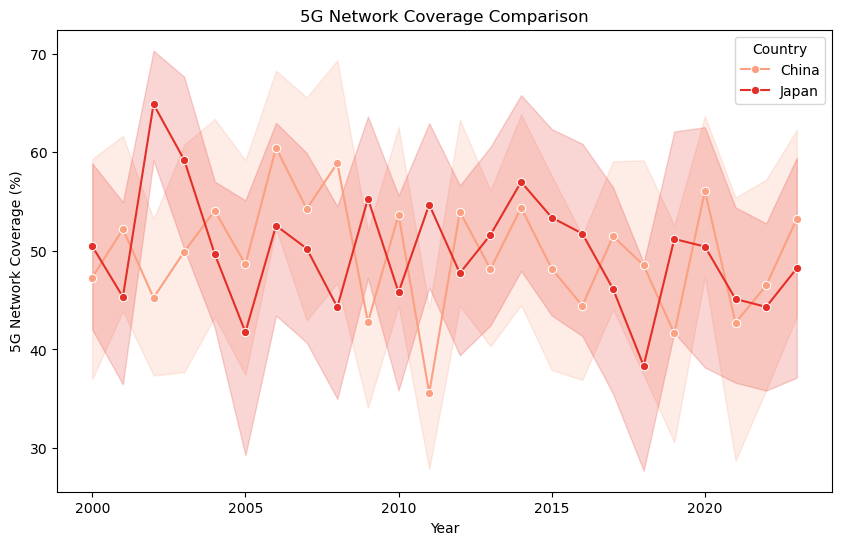

In [111]:
# 5G Network Coverage comparision
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='5G Network Coverage (%)', hue='Country', marker='o', palette='Reds')
plt.title('5G Network Coverage Comparison')
plt.xlabel('Year')
plt.ylabel('5G Network Coverage (%)')
plt.show()

- R & D Investment refers to the funds of that a company or gorvement that spends on researching and developing new products, technologies, or services. In this datasets, R&D Investment reflect the amount of money of China and Japan's goverment have invested(2001-2023)
- From the plot, we can see that: 
+ 2000 - 2005: 
+ Both goverment have spent money stable but Japan spent more on this phase
+ 2005 - 2010:
+ China had a strong investment during this period, with investment capital increasing strongly compared to Japan and at times even higher than Japan.
+ 2010 - 2023: 
+ From 2015 onward, Japan investment becomes more comparable or even slightly higher than China
- Conclusion: 
--> Japan have invested in this field more stable and more money than China, this can prove by the Confidence Interval in the plot(the CI of China is wider than Japan)

In [112]:
japan_data = df[df['Country'] == 'Japan']
total_rd_investment_japan = japan_data['R&D Investment (in USD)'].sum()
china_data = df[df['Country'] == 'China']
total_rd_investment_china = china_data['R&D Investment (in USD)'].sum()
total_patents_japan = df[df['Country'] == 'Japan']['Number of Patents Filed (Annual)'].sum()
total_patents_china = df[df['Country'] == 'China']['Number of Patents Filed (Annual)'].sum()

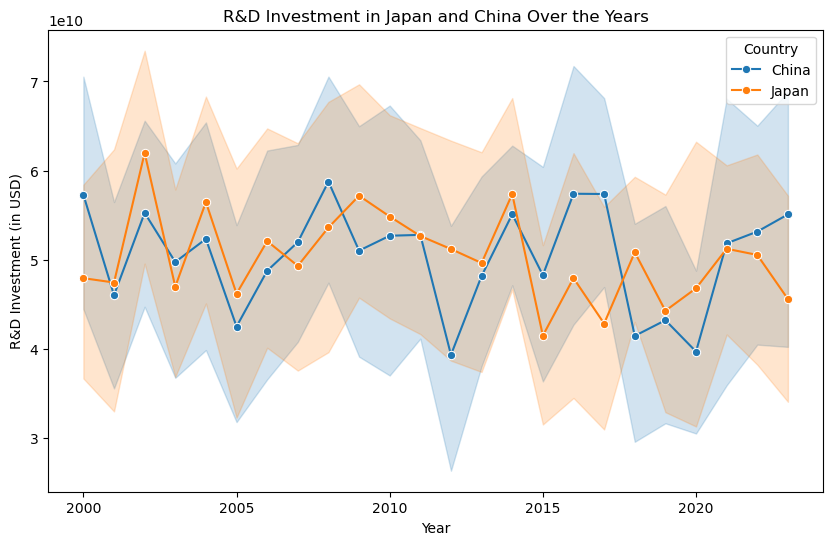

In [96]:
# R and D Investment Compare 
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x=df["Year"], y=df['R&D Investment (in USD)'],hue=df['Country'],marker='o')
plt.title('R&D Investment in Japan and China Over the Years')
plt.show()

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


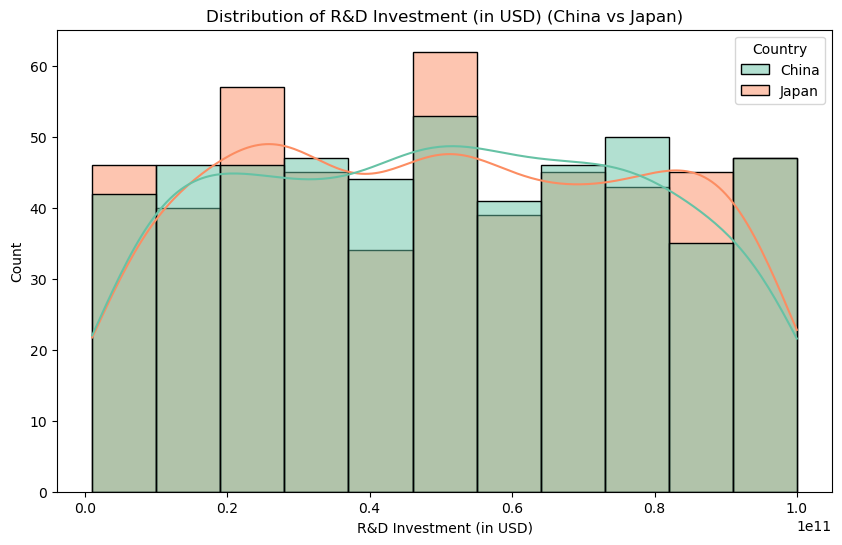

In [60]:
# Distribution of R and D Investment 
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='R&D Investment (in USD)', hue='Country', kde=True, palette='Set2')
plt.title('Distribution of R&D Investment (in USD) (China vs Japan)')
plt.xlabel('R&D Investment (in USD)')
plt.show()

Compare the Market Share of Tech Sector field:
+ China is a bit stronger in AI, Telecommunications,Semiconductors,Robotics and Biotechnology
+ While Japan is a higher in Software and a bit in Cloud Computing
+ In general, there no much different in Market Share and both nations have a diversified technology field, the distribution of each Tech Sector is fairly and most of areas is not too higher than others.
+ 

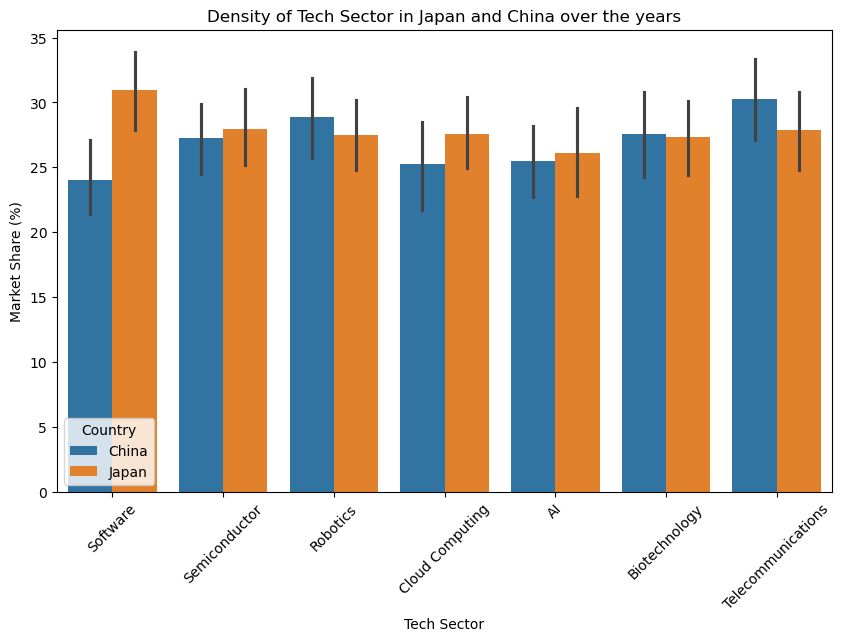

In [97]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x=df['Tech Sector'],y=df['Market Share (%)'],hue=df['Country'])
plt.title('Density of Tech Sector in Japan and China over the years')
plt.xticks(rotation = 45)
plt.show()

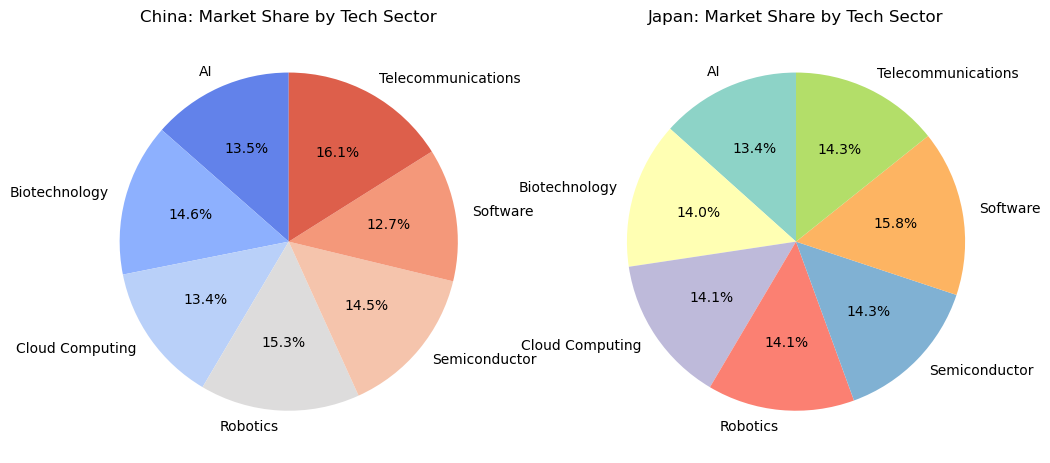

In [100]:
# Compare Market Share in each Tech Sector field
china_market_share = df[df['Country'] == 'China'].groupby('Tech Sector')['Market Share (%)'].mean()
japan_market_share = df[df['Country'] == 'Japan'].groupby('Tech Sector')['Market Share (%)'].mean()
# Pie chart 1 for China and 2 for Japan
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].pie(china_market_share, labels=china_market_share.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(china_market_share)))
axes[0].set_title('China: Market Share by Tech Sector')
axes[1].pie(japan_market_share, labels=japan_market_share.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(japan_market_share)))
axes[1].set_title('Japan: Market Share by Tech Sector')
plt.show()

From 4 plot can see that: 
- Although Japan has less startup but the venture funding they spend is more than China. Japan is focus on Robotics, Semiconductors,Cloud Computing and Telecomunications while China dominant in AI,Biotechnology and Software.
- China have more Patents Filed than Japan but this seem they spend money on buying it while Japan focus on their inside research more. This can explain by the the total University Research Collaborations of Japan is higher than China

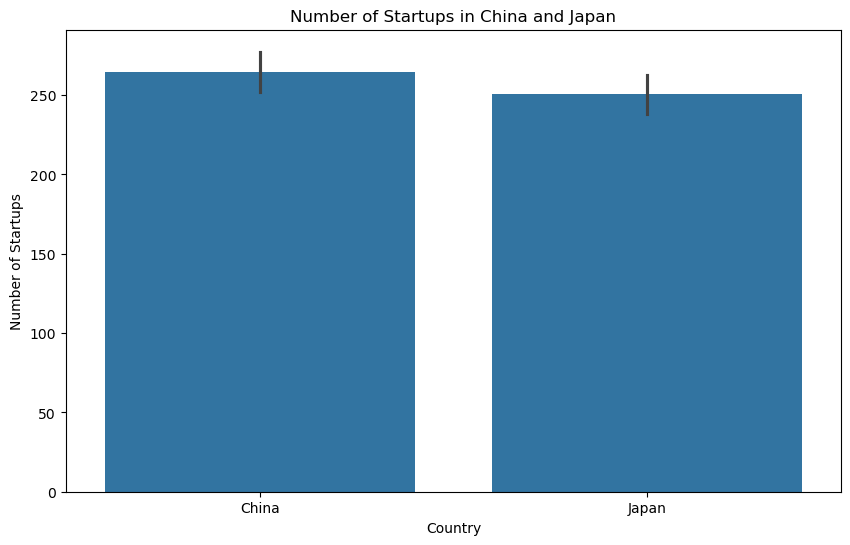

In [101]:
# Compare Number of Startups
plt.figure(figsize=(10,6))
sns.barplot(data=df, x=df['Country'], y=df['Number of Startups'])
plt.title('Number of Startups in China and Japan')
plt.xlabel('Country')
plt.ylabel('Number of Startups')
plt.show()


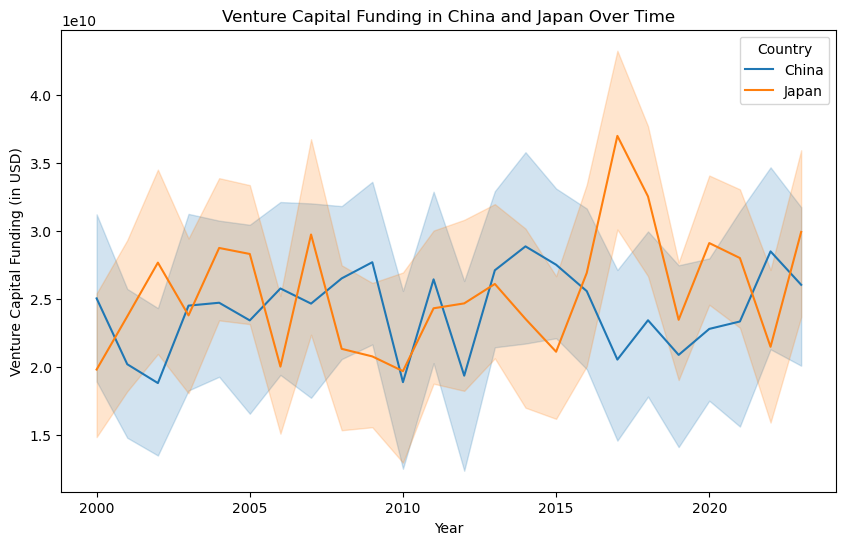

In [102]:
# Line plot for Venture Capital Funding
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Venture Capital Funding (in USD)', hue='Country', data=df)
plt.title('Venture Capital Funding in China and Japan Over Time')
plt.show()

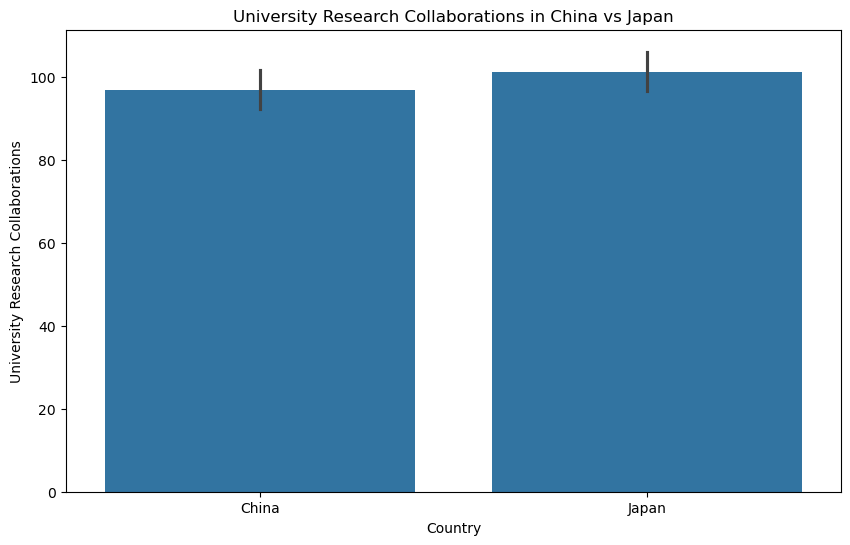

In [103]:
# Bar plot for University Research Collaborations
plt.figure(figsize=(10,6))
sns.barplot(x='Country', y='University Research Collaborations', data=df[df['Country'].isin(['China', 'Japan'])])
plt.title('University Research Collaborations in China vs Japan')
plt.show()

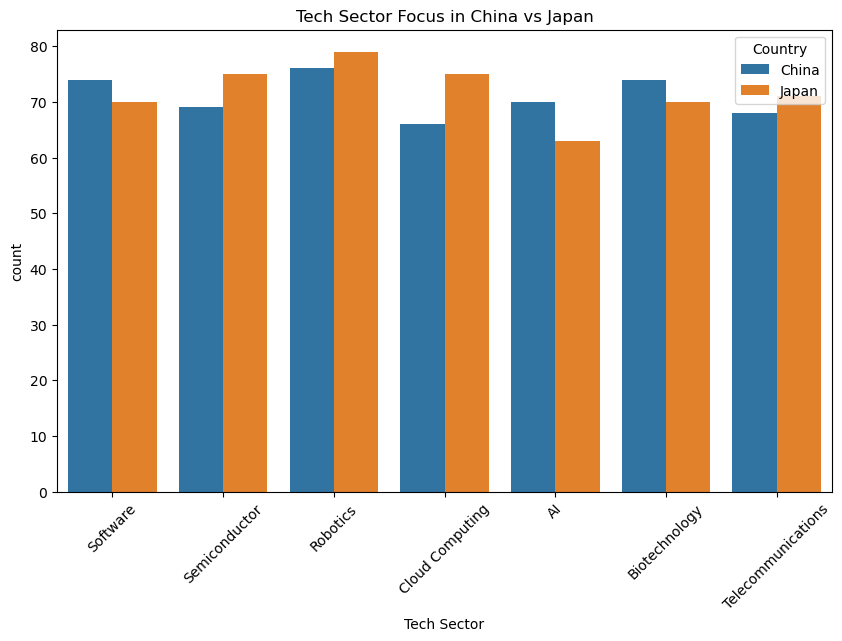

In [104]:
# Count plot for Tech Sector distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Tech Sector', hue='Country', data=df[df['Country'].isin(['China', 'Japan'])])
plt.title('Tech Sector Focus in China vs Japan')
plt.xticks(rotation=45)
plt.show()

Use Arima model to predict R and D Investment in 2024 
- The model use AR(Auto Agressive), I(Integrated), MA(Moving Average) with all parameters equal to 1
- AR(Auto Agressive): Capture values from the past
- I(Integrated): ensures the series is stationary by differencing
- MA(Moving Average): Captures the influence of past forecast errors
- The result of the prediction for Japan is 46.09 billion USD and China is 56.70 billion USD

In [69]:
# Filter data for Japan and China
japan_data = df[df['Country'] == 'Japan'][['Year', 'R&D Investment (in USD)']].sort_values(by='Year')
china_data = df[df['Country'] == 'China'][['Year', 'R&D Investment (in USD)']].sort_values(by='Year')

In [74]:
# ARIMA model for Japan
japan_rd_investment = japan_data.set_index('Year')
japan_model = ARIMA(japan_rd_investment, order=(5,1,0))  
japan_model_fit = japan_model.fit()
japan_forecast = japan_model_fit.forecast(steps=1)
# ARIMA model for China
china_rd_investment = china_data.set_index('Year')
china_model = ARIMA(china_rd_investment, order=(5,1,0))  
china_model_fit = china_model.fit()
china_forecast = china_model_fit.forecast(steps=1)

d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will 

In [110]:
# Extract forecasted values
japan_forecast_value = japan_forecast.iloc[0]
china_forecast_value = china_forecast.iloc[0]
print(f"Japan's Predicted R&D Investment for Next Year: {japan_forecast_value}")
print(f"China's Predicted R&D Investment for Next Year: {china_forecast_value}")

Japan's Predicted R&D Investment for Next Year: 46087269794.300896
China's Predicted R&D Investment for Next Year: 56704166882.06736


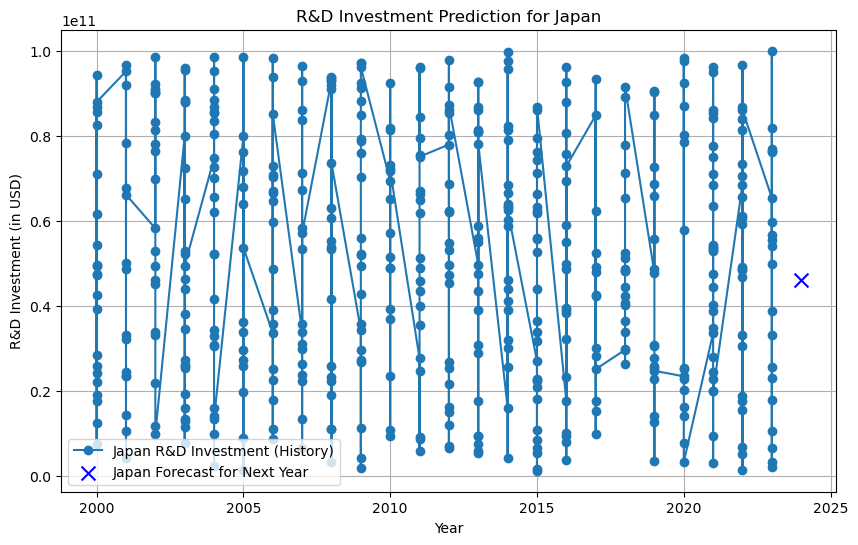

In [87]:
# Plot for Japan
plt.figure(figsize=(10,6))
plt.plot(japan_data['Year'], japan_data['R&D Investment (in USD)'], label='Japan R&D Investment (History)', marker='o')
plt.scatter(japan_data['Year'].max() + 1, japan_forecast_value, color='blue', label='Japan Forecast for Next Year', marker='x', s=100)
plt.title('R&D Investment Prediction for Japan')
plt.xlabel('Year')
plt.ylabel('R&D Investment (in USD)')
plt.legend()
plt.grid(True)
plt.show()

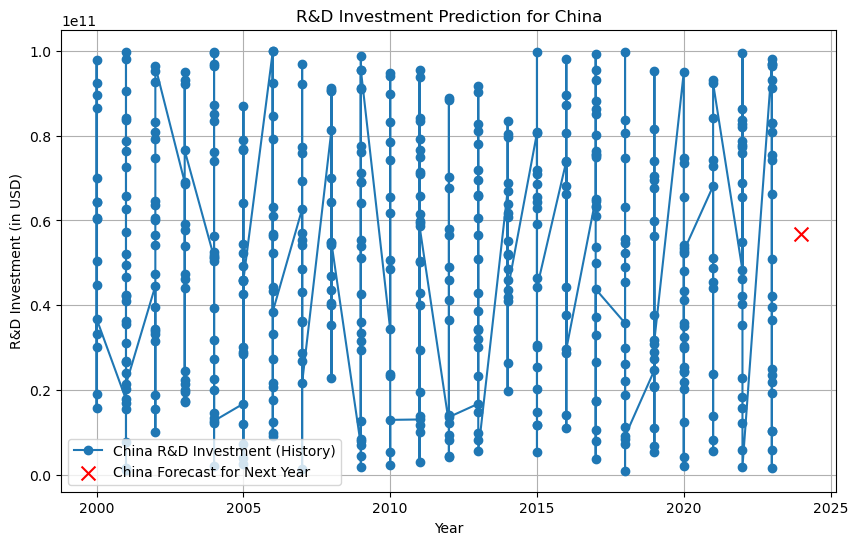

In [83]:
# Plot for China
plt.figure(figsize=(10,6))
plt.plot(china_data['Year'], china_data['R&D Investment (in USD)'], label='China R&D Investment (History)', marker='o')
plt.scatter(china_data['Year'].max() + 1, china_forecast_value, color='red', label='China Forecast for Next Year', marker='x', s=100)
plt.title('R&D Investment Prediction for China')
plt.xlabel('Year')
plt.ylabel('R&D Investment (in USD)')
plt.legend()
plt.grid(True)
plt.show()